<img src="./Logo.jpg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo Semanal 2
## Análisis y síntesis de filtros Activos
### Jorge Andres Niño


Se analiza el circuito presentado en a continuación, obteniendo la respuesta en frecuencia, donde $H_0(s)=\frac{V_o}{V_i}$ en función de $\omega _0$ y $Q$. Por otra parte para la transferencia obtenida, se calcula la red para que $\omega _0 = 1$ y $Q = 3$ y además analizamos $R1$ para que $|T(0)| = 20 db$.

![*Figura 1*](ackemoss.png)

## Analísis del función transferencia.

In [1]:
from IPython.display import IFrame, display
IFrame("./sos_pb_lapiz.pdf", width=1000, height=1000)

### Respuesta en frecuencia, fase y diagrama de polos y ceros.

A continuación vamos a simular en python la función transferencia obtenida, para los parametros pedidos, y luego verificaremos con LTSPICE, lo obtenido en la simulación numerica

In [2]:
# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

from scipy import signal as Funcion
import numpy as np
import matplotlib.pyplot as plt


# las librerías que usarremos las cargamos solo una vez.

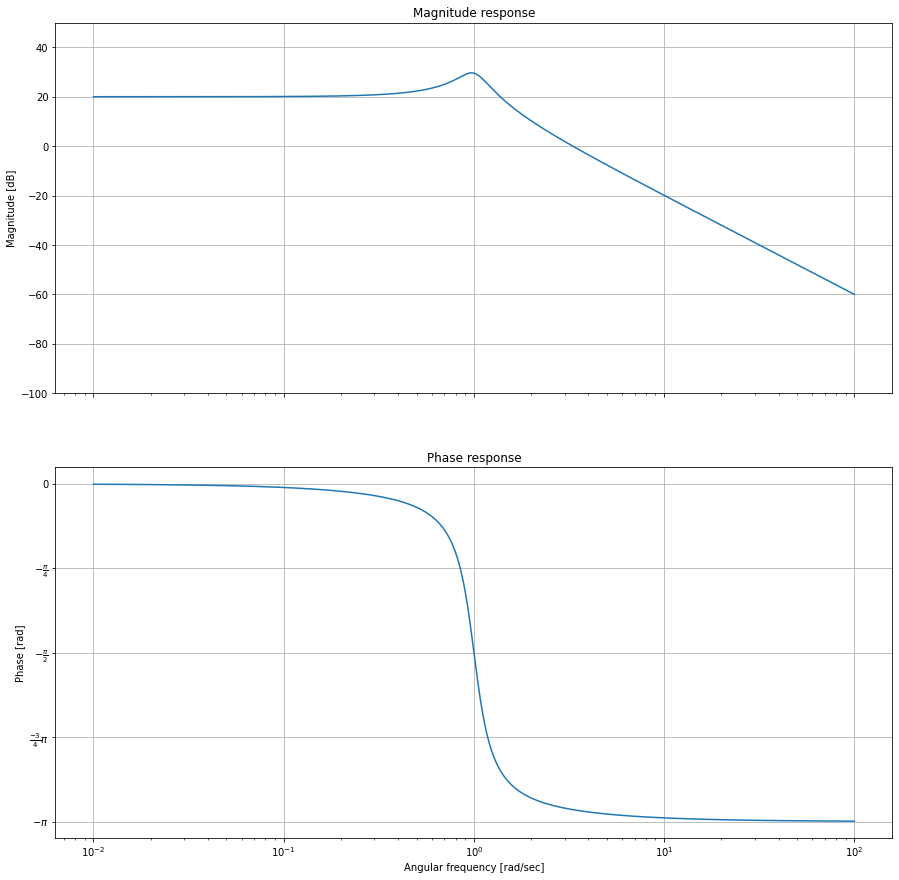

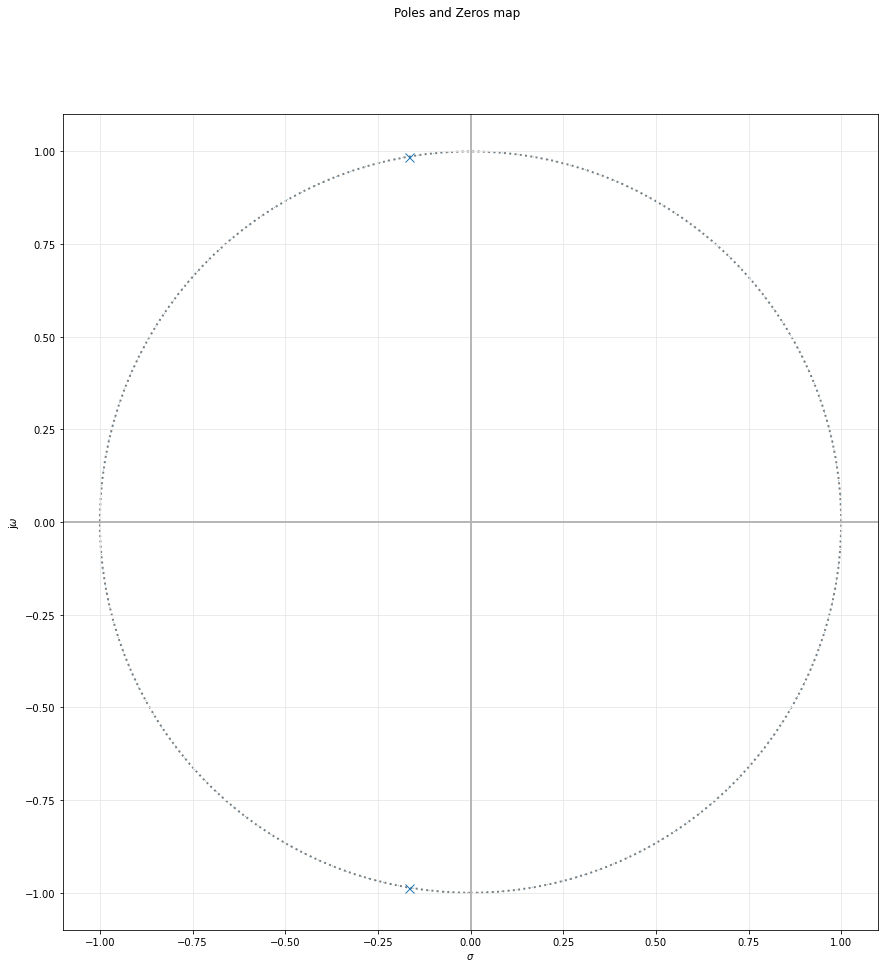

In [6]:
#%% Funcion trasnferencia:

w0 = 1
qq=3

num = np.array([ 10*w0**2 ])
den = np.array([w0, w0/qq, w0**2 ])

H1 = Funcion.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H1)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
plt.ylim([-100,50])

plt.gca

pzmap(H1)

plt.rcParams['figure.figsize'] = (30,30)

plt.show()


Se presenta el caso donde se hace valer: $$ R3=1K \Omega, C1=1\mu F, k = \frac{R2}{R1} =1$$ 
Se simula tanto la respuesta en frecuencia en python (donde se calcula $f_0 = 159.2Hz$  o también   $\omega _0 = 1Ks^{-1}$)
y ademas se simula en LTSpice.

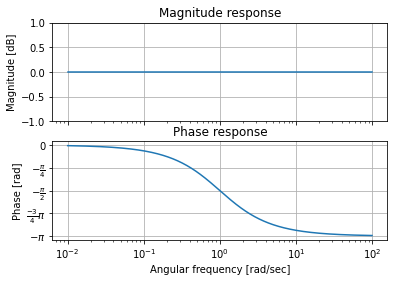

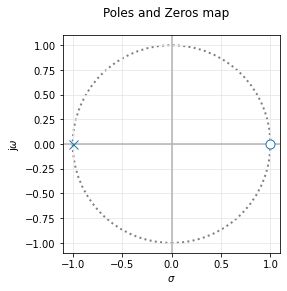

In [28]:
#%% Funcion trasnferencia para un caso particular:

R3= 1000
C1 = 1e-6
k = 1
w = 1/(R3*C1)  #w0 será 1Kr/s, es decir 159.2 Hz

num = np.array([ -k/(R3*C1), w ])
den = np.array([ k/(R3*C1), w ])

H1 = Funcion.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H1)
plt.sca(axes_hdl[0])
plt.ylim([-1,1])

plt.gca

pzmap(H1)

plt.show()

### Respuesta en frecuencia y fase en LTSPICE

![*Figura 4*](CircuitoLTSPICE.png)

![*Figura 5*](TS1_LTSPICE_1.png)

# Utilidad de filtro Pasa-todo:
 * Nos permite, sin atenuar la señal o sin cambiar su forma, obtener en función de la frecuencia
 un cambio de fase, o un desplazamiento de fase. Este efecto puede emplearse en música directamente para reverberación sin cambiar la señal.